# Welcome to the Machine Learning's first workshop on Linear Regression!
#### In this example, we will be going over "Multiple/Mulvariate linear regression" which involves multiple variables and is similar to simple linear regression but differs in how we will evaluate it. 
#### We will be using the red wine quality dataset which contains variables of the Portuguese "Vinho Verde" wine.
#### To get started, please download this dataset [here](https://drive.google.com/file/d/195gkZ5cTZL11L308MHc7EyBbAoiB4xqf/view?usp=sharing).
#### If the syntax of the libraries are not clear, please go ahead and check their documentation to see what particular syntax means. You can access them here or googling the particular functions that you are not sure of.
[sklearn](https://drive.google.com/file/d/195gkZ5cTZL11L308MHc7EyBbAoiB4xqf/view?usp=sharing), [pandas](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html) , [matplotlib](https://matplotlib.org/3.1.1/users/index.html) , [seaborn](https://seaborn.pydata.org/), [numpy](https://numpy.org/doc/)




In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as seabornInstance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from google.colab import files
import io
%matplotlib inline

# Loading and Cleaning Our Data

We will now upload the wine quality dataset and use the pandas library to store the data in a dataframe

This is only one way of uploading and reading in your data. Another way that is also commonly used is using that same pandas library method but passing in a url as the parameter that contains the dataset

In [0]:
uploaded = files.upload()

Saving winequality.csv to winequality.csv


In [0]:
# Store the data in dataframe, a 2-d data structure from the Pandas library 
df = pd.read_csv(io.BytesIO(uploaded['winequality.csv']))
# Prints out the dimensions of our data
print(df.shape)
# Check to see if your object has the right data - Returns the specified n number of rows
df.head(5) 

(1599, 12)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


Great! Now that we have our data, let's clean it up a bit. To do so, we will first determine whether or not there are any columns that has the NaN values.

In [0]:
df.isnull().any

<bound method DataFrame.any of       fixed acidity  volatile acidity  citric acid  ...  sulphates  alcohol  quality
0             False             False        False  ...      False    False    False
1             False             False        False  ...      False    False    False
2             False             False        False  ...      False    False    False
3             False             False        False  ...      False    False    False
4             False             False        False  ...      False    False    False
...             ...               ...          ...  ...        ...      ...      ...
1594          False             False        False  ...      False    False    False
1595          False             False        False  ...      False    False    False
1596          False             False        False  ...      False    False    False
1597          False             False        False  ...      False    False    False
1598          False             Fa

After we execute the previous command, all columns should return False. However, if there are any True values, we will remove them

In [0]:
df = df.fillna(method='ffill')

# Attributes and Labels

Nice! Now that we've cleaned up our data, we will now divide the data into two parts: attributes/features and labels. Your features can be thought of as inputs while your labels are outputs. Back to our training dataset, some of the column headers we see in the data are fixed acidity, volatile acidity, etc. and these would be the features. Labels will be the outputs we get from our model as we pass in our features.

In [0]:
featureNames = ['fixed acidity', 'volatile acidity', 'citric acid', 
          'residual sugar', 'chlorides', 'free sulfur dioxide',
          'total sulfur dioxide', 'density', 'pH', 'sulphates',
          'alcohol']
#Variable to store our features
X = df[featureNames]
print(X)
#Variable to store our label
y = df['quality']
print(y)


      fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
0               7.4             0.700         0.00  ...  3.51       0.56      9.4
1               7.8             0.880         0.00  ...  3.20       0.68      9.8
2               7.8             0.760         0.04  ...  3.26       0.65      9.8
3              11.2             0.280         0.56  ...  3.16       0.58      9.8
4               7.4             0.700         0.00  ...  3.51       0.56      9.4
...             ...               ...          ...  ...   ...        ...      ...
1594            6.2             0.600         0.08  ...  3.45       0.58     10.5
1595            5.9             0.550         0.10  ...  3.52       0.76     11.2
1596            6.3             0.510         0.13  ...  3.42       0.75     11.0
1597            5.9             0.645         0.12  ...  3.57       0.71     10.2
1598            6.0             0.310         0.47  ...  3.39       0.66     11.0

[1599 rows x 11

Now that we have our data stored, let's check the average value of our label, or the 'quality' column. Visualizing these labels will be helpful to see the actual labels vs when we predict them with our linear regression model.

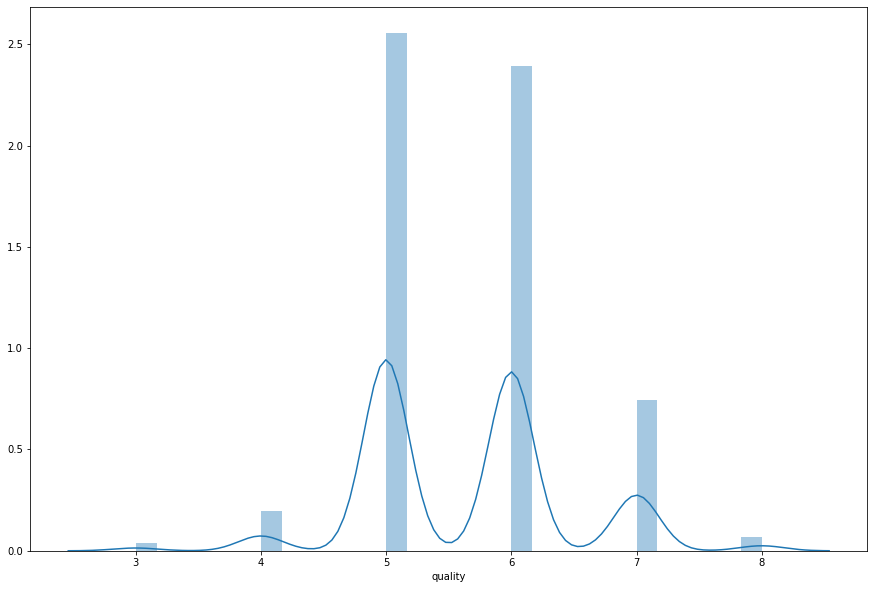

In [0]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df['quality'])

# Training and Testing Data
From the plot, we can see that the value of the label is 5 or 6.

We will now split 80% of the data to the training set while 20% of the data to the test set. Our training set is the sample of data that will be used to fit/implement the model, while a test set is used to validate the model built from the training set.

In other words, we will use X_Train and y_train to build the model. Once we build the model, we will pass in the X_test to the model, which will return us predictions for the X_test data that the model has never seen before. We will compare these predictions to y_test, the actual Ttarget values of X_test.

In [0]:
#X_train is the training data set
#y_train is the set of labels for all the data in the training data set
#x_test is the test data set
#y_test is the set of labels to all the data in x_test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
print("The training data set is", X_train)
print("The labels for the training data set is", y_train)
print("The testing data set is:", X_test)
print("The labels for the testing data set is", y_train)


The training data set is       fixed acidity  volatile acidity  citric acid  ...    pH  sulphates  alcohol
642             9.9             0.540         0.45  ...  3.39       0.62      9.4
679            10.8             0.260         0.45  ...  3.13       0.54      9.6
473             9.9             0.350         0.55  ...  3.26       0.79     10.6
390             5.6             0.850         0.05  ...  3.56       0.82     12.9
1096            6.6             0.725         0.09  ...  3.35       0.49     10.8
...             ...               ...          ...  ...   ...        ...      ...
763             9.3             0.655         0.26  ...  3.25       0.42      9.6
835             7.6             0.665         0.10  ...  3.39       0.51      9.3
1216            7.9             0.570         0.31  ...  3.29       0.69      9.5
559            13.0             0.470         0.49  ...  3.30       0.68     12.7
684             9.8             0.980         0.32  ...  3.25       0.48 

# Training Our Model
We use train_test_split to split our arrays of data into random training and test subsets. Now that we've split up our data, let's train our model!


In [0]:
#initialize the model
regressor = LinearRegression()
# fit linear model onto data 
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Our end goal here in the case of multivariable linear regression is for our model to be able to find the most optimal coefficients for all the attributes. The following script will show the coefficients our regression model has chosen.

In [0]:
#create dataframe which has oefficients of the model we built as data, columns of X (columns of original data) as rows and "Coefficient" string as column
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
fixed acidity,0.041284
volatile acidity,-1.149528
citric acid,-0.177927
residual sugar,0.027870
chlorides,-1.873407
free sulfur dioxide,0.002684
total sulfur dioxide,-0.002777
density,-31.516666
pH,-0.254486
sulphates,0.924040


Looking at our coefficients, we see that the features that have the most effect on the quality of wine are chlorides and density. 

We will now evaluate predictions using our test data.

In [0]:
y_pred = regressor.predict(X_test)

After running the code above, let's check the difference between the actual value vs the predicted value as well as plot the comparison.

      Actual  Predicted
1109       6   5.782930
1032       5   5.036193
1002       7   6.596989
487        6   5.339126
979        5   5.939529
1054       6   5.007207
542        5   5.396162
853        6   6.052112
1189       4   4.867603
412        5   4.950676
1099       5   5.285804
475        5   5.412653
799        6   5.705742
553        5   5.129217
1537       6   5.528852
1586       6   6.380524
805        7   6.810125
1095       5   5.738033
1547       5   5.976188
18         4   5.086134
1177       7   6.344799
549        6   5.164010
1341       6   5.642040
1235       4   6.146290
191        6   5.481780


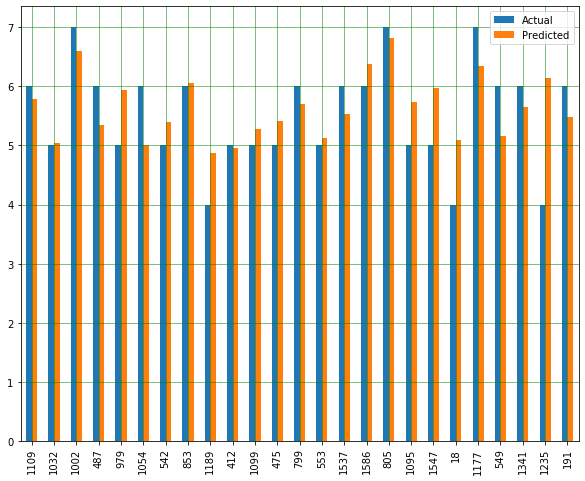

In [0]:
#Check difference between actual value vs predicted
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
dfPlot = df.head(25)
print(dfPlot)
#Plot
dfPlot.plot(kind='bar', figsize=(10, 8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()


# Evaluating Performance

Looks like we have some good results where our predictions are fairly close to the actual values!

The final step will be to evaluate the performance of our model. To do so, we will be finding the values of the Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).

Mean Absolute Error (MAE): Measure of the average magnitude of errors in a set of predictions. Average over test sample of absolute differences between predicted and absolute values. 

![alt text](https://miro.medium.com/max/473/1*OVlFLnMwHDx08PHzqlBDag.gif)

Root Mean Squared Error (RMSE): Quadratic scoring rule that also measures the average magnitude of the error. It is the square root of the average of squared differences between prediction and actual observation. 

![alt text](https://miro.medium.com/max/491/1*9hQVcasuwx5ddq_s3MFCyw.gif)


Similarities between the two:
Both used to average model prediction error and can range from 0 to infinity and are indifferent to the direction of errors. 

Differences between the two:
For RMSE, since the errors are squared before averaged, it gives a relatively high weight to large errors. Meaning that using the RMSE is more useful when larger errors are more undesirable.



In [0]:
print('The Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

The Mean Absolute Error: 0.46963309286611105
Root Mean Squared Error: 0.620057414938427


# Conclusion

What do these results mean? 
Our model was not very accurate but can still make good predictions.
The inaccuracies that we should take into account as to what factors could have contributed to this:

**Data:** More data is needed in order to get the best possible predictions.
**Assumption of relationship:** Assuming this data could best be fit through a linear relationship. 
**Features Chosen:** The features we chose from the data may not have had a high enough correlation to the values we were attempting to predict.